/tmp/ipython-input-3-308582212.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2015-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


Price        Date      Close       High        Low       Open     Volume
Ticker                  AAPL       AAPL       AAPL       AAPL       AAPL
0      2015-01-02  24.288580  24.757334  23.848706  24.746226  212818400
1      2015-01-05  23.604336  24.137516  23.417723  24.057539  257142000
2      2015-01-06  23.606558  23.866483  23.244438  23.668762  263188400
3      2015-01-07  23.937571  24.037541  23.704304  23.815383  160423600
4      2015-01-08  24.857304  24.915065  24.148618  24.266363  237458000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        2264 non-null   datetime64[ns]
 1   (Close, AAPL)   2264 non-null   float64       
 2   (High, AAPL)    2264 non-null   float64       
 3   (Low, AAPL)     2264 non-null   float64       
 4   (Open, AAPL)    2264 non-null   float64       
 5   (Volume, AAPL)

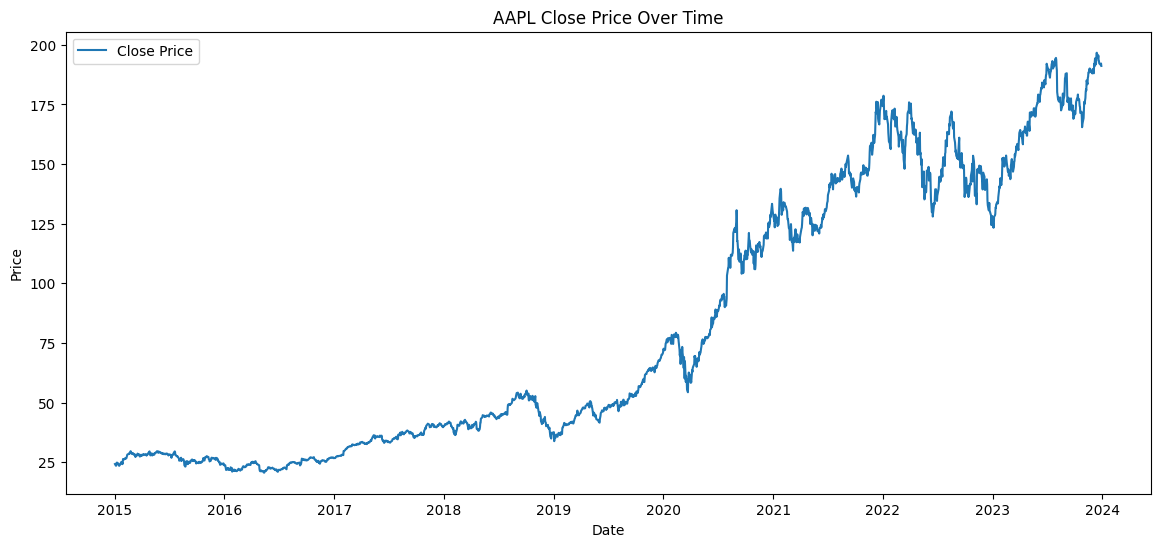

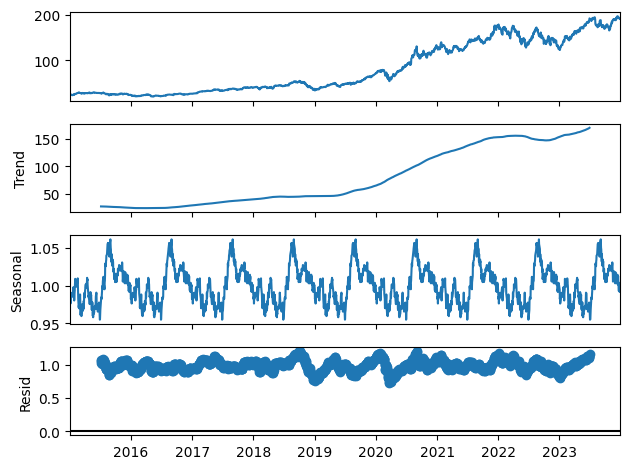

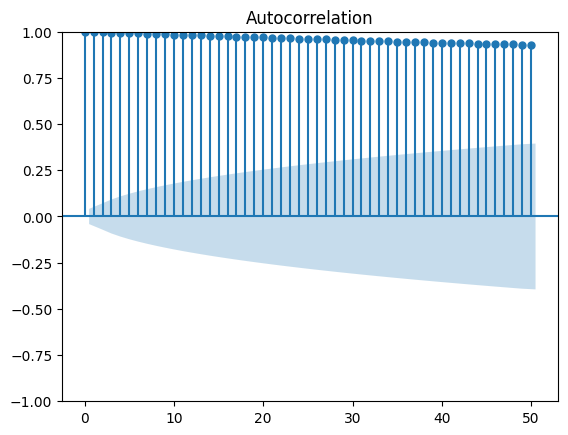

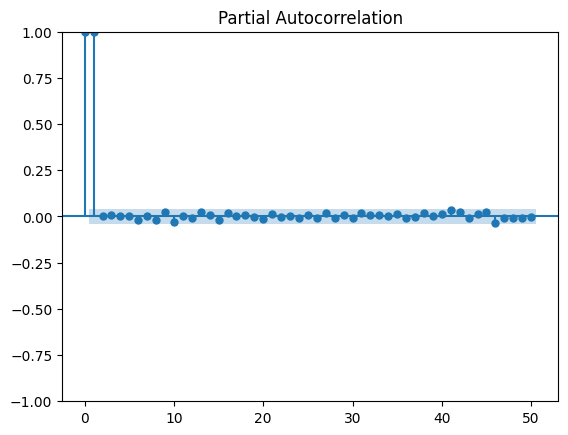

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import yfinance as yf

# Load data
ticker = 'AAPL'
df = yf.download(ticker, start='2015-01-01', end='2023-12-31')
df = df.reset_index()

# Check data
print(df.head())
df.info()

# Check for missing values
print(df.isnull().sum())

# Set Date as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Plot Close Price
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price')
plt.title(f'{ticker} Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='multiplicative', period=252)
result.plot()
plt.show()

# Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Close'].dropna(), lags=50)
plot_pacf(df['Close'].dropna(), lags=50)
plt.show()
